# NAME:AAKASH SHYAMLAL GUPTA

# TASK NO 2: PREDICTIONS USING DESION TREE ALGORITHM


 ## Importing Libraries


In [118]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import warnings
from sklearn.datasets import load_iris


## Loading Dataset

In [119]:
iris=load_iris()

In [120]:
iris=pd.read_csv('iris.csv')

## Data Understanding

In [121]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [122]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [123]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [124]:
iris.shape

(150, 6)

In [125]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [126]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [127]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Data Cleaning

### Removing Unnecessary Columns

In [128]:
iris.drop("Id",inplace=True,axis=1)

In [129]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Removing Duplicate Rows

In [130]:
iris.duplicated().sum()

3

In [131]:
iris.shape

(150, 5)

In [132]:
iris.drop_duplicates(inplace=True)

In [133]:
iris.duplicated().sum()

0

In [134]:
iris.shape

(147, 5)

### Filling Null Values¶


In [135]:
iris.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

## Data Visualizing

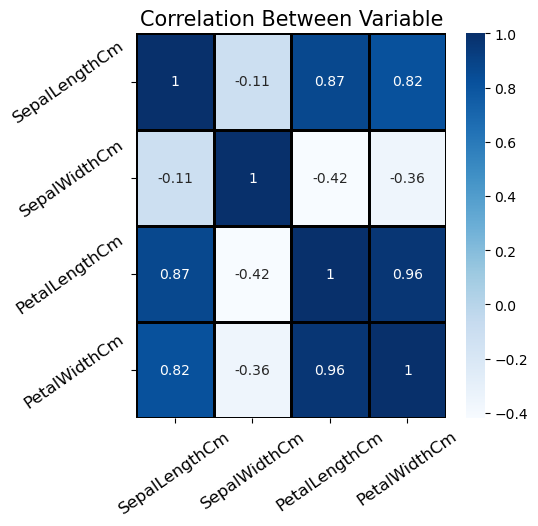

In [136]:
corr=iris.corr()
plt.figure(figsize=(5,5))
sns.heatmap(data=corr,annot=True,cmap='Blues',linewidth=1,linecolor='Black')
plt.title("Correlation Between Variable",size=15)
plt.xticks(rotation=35,size=12)
plt.yticks(rotation=35,size=12)
plt.show()

In [137]:
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


<Axes: >

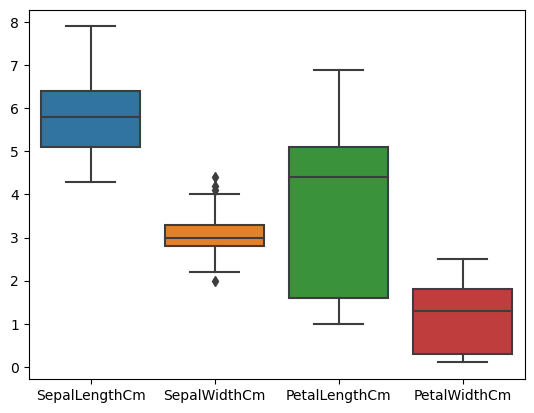

In [138]:
sns.boxplot(data=iris)

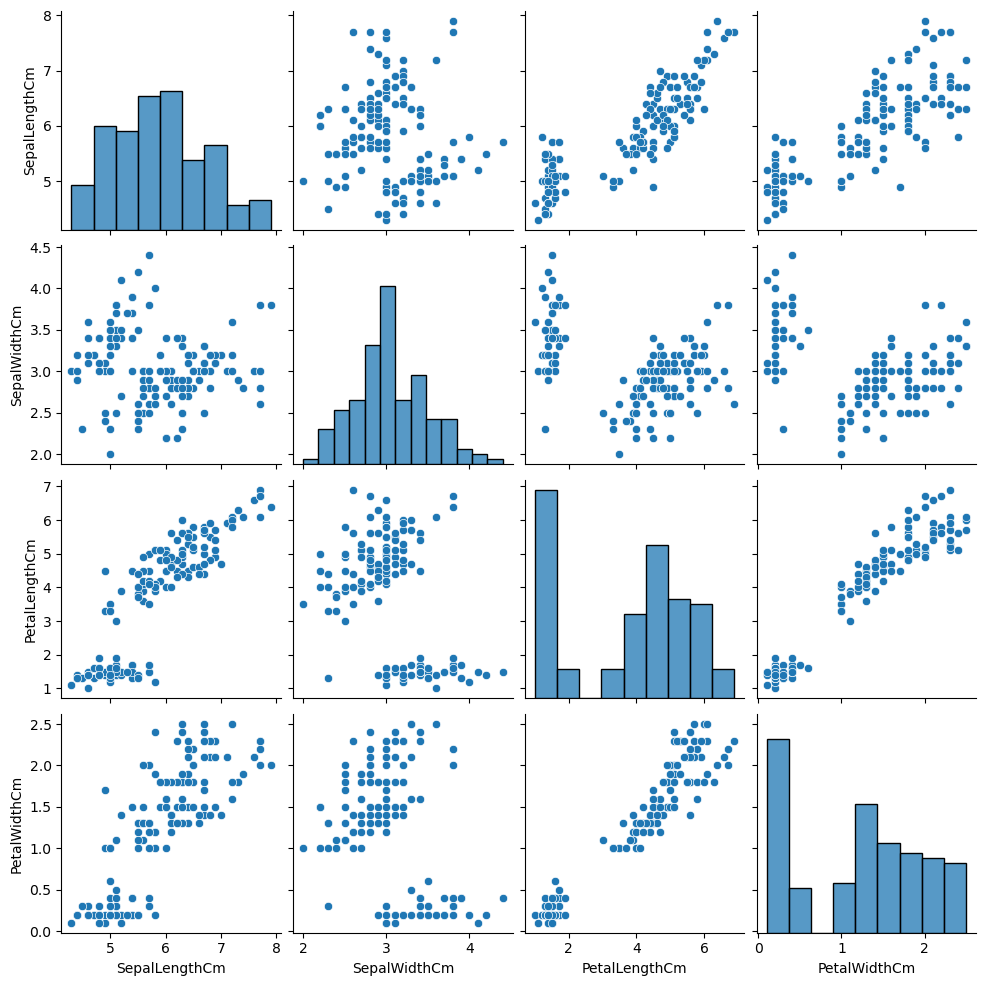

In [139]:
sns.pairplot(data=iris)

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

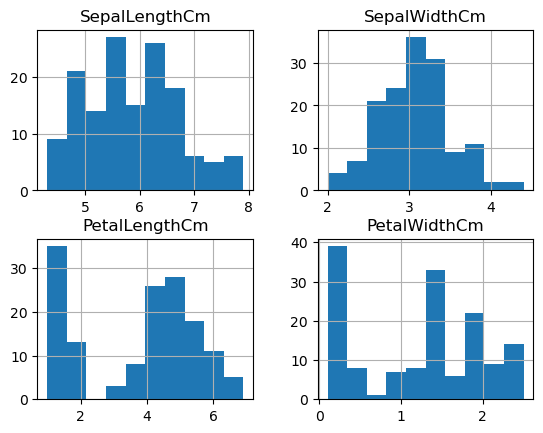

In [140]:
iris.hist()

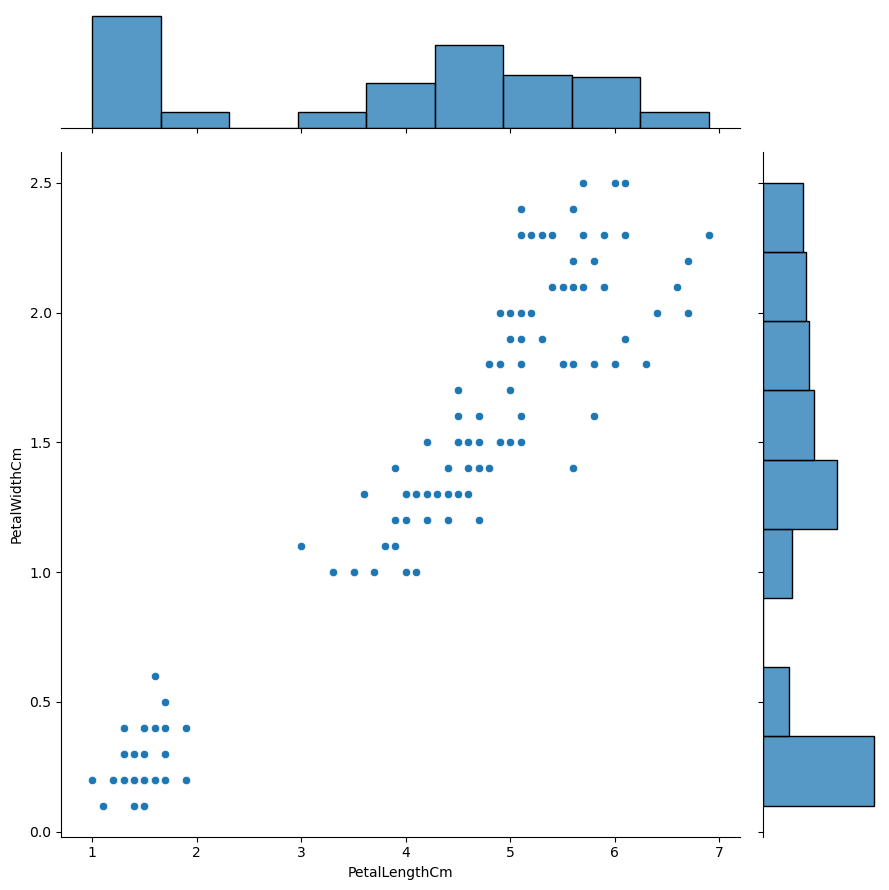

In [141]:
sns.jointplot(x="PetalLengthCm",y="PetalWidthCm",data=iris,height=9)

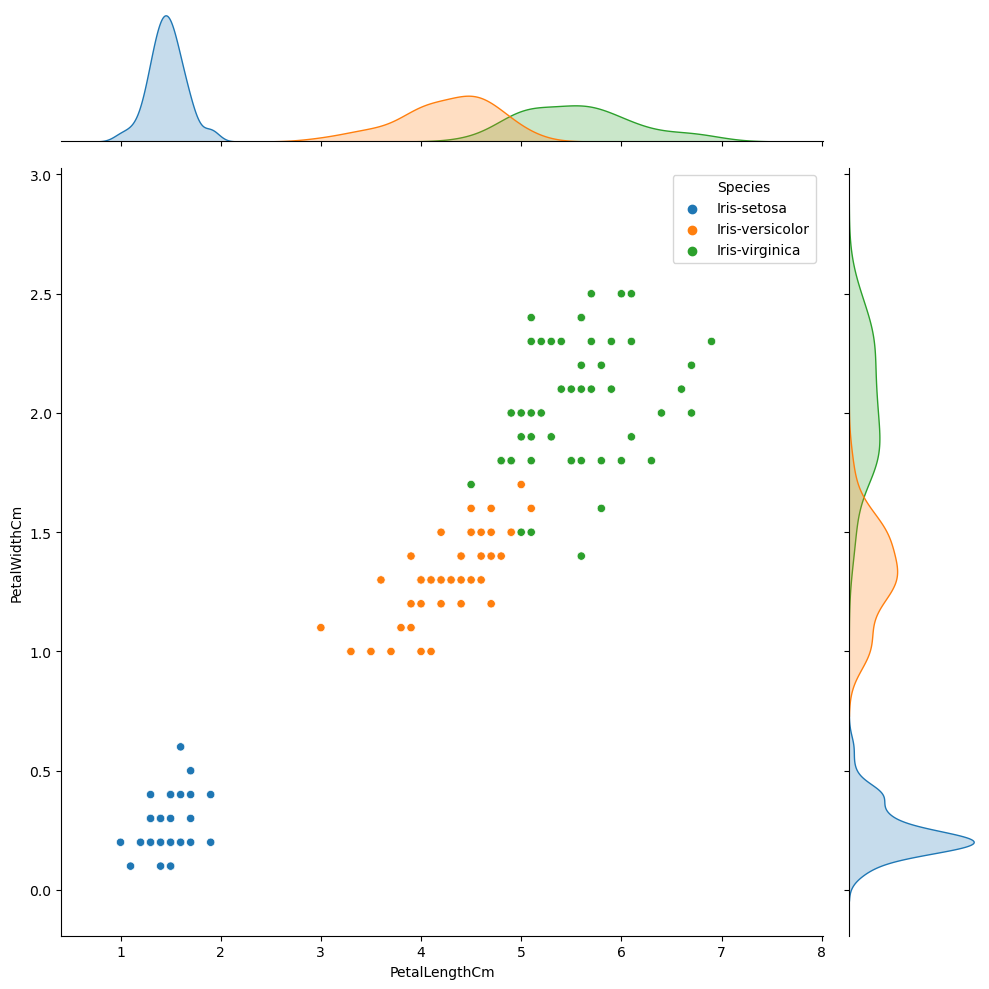

In [142]:
sns.jointplot(x="PetalLengthCm",y="PetalWidthCm",data=iris,height=10,hue='Species')

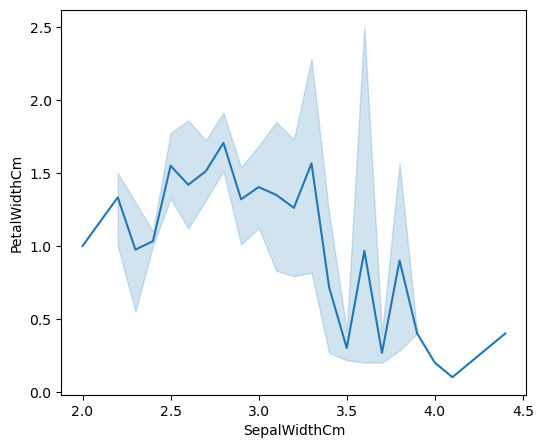

In [143]:
plt.figure(figsize=(6,5))
sns.lineplot(x='SepalWidthCm',y='PetalWidthCm',data=iris)
plt.show()

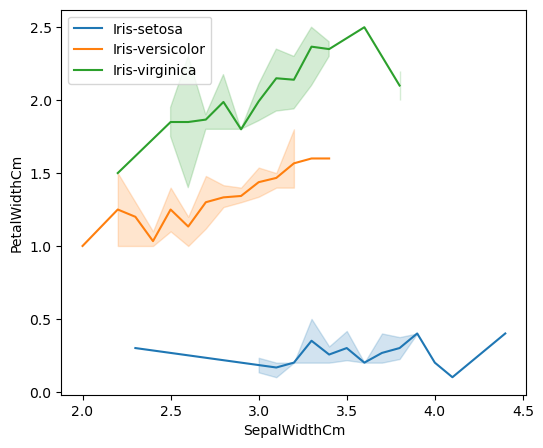

In [144]:
plt.figure(figsize=(6,5))
sns.lineplot(x='SepalWidthCm',y='PetalWidthCm',data=iris,hue='Species')
plt.legend()
plt.show()

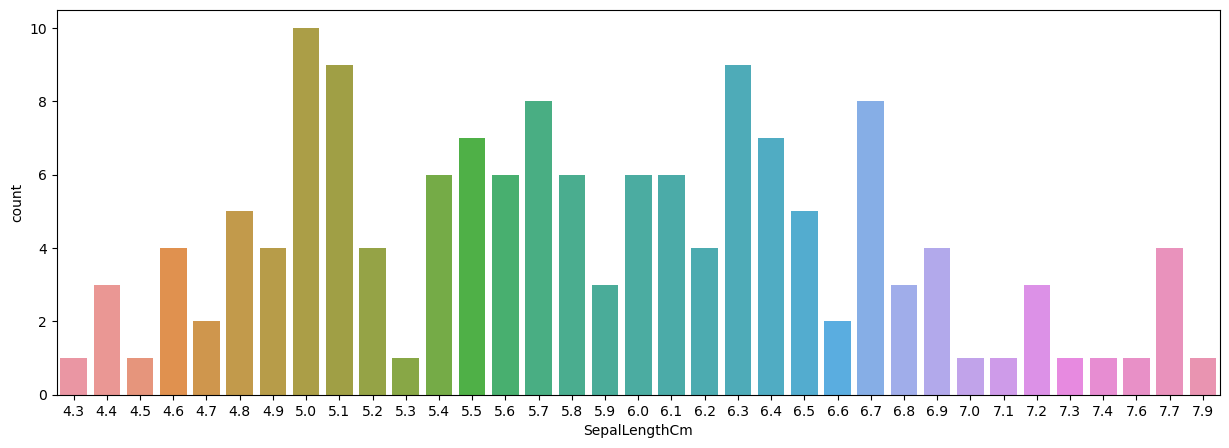

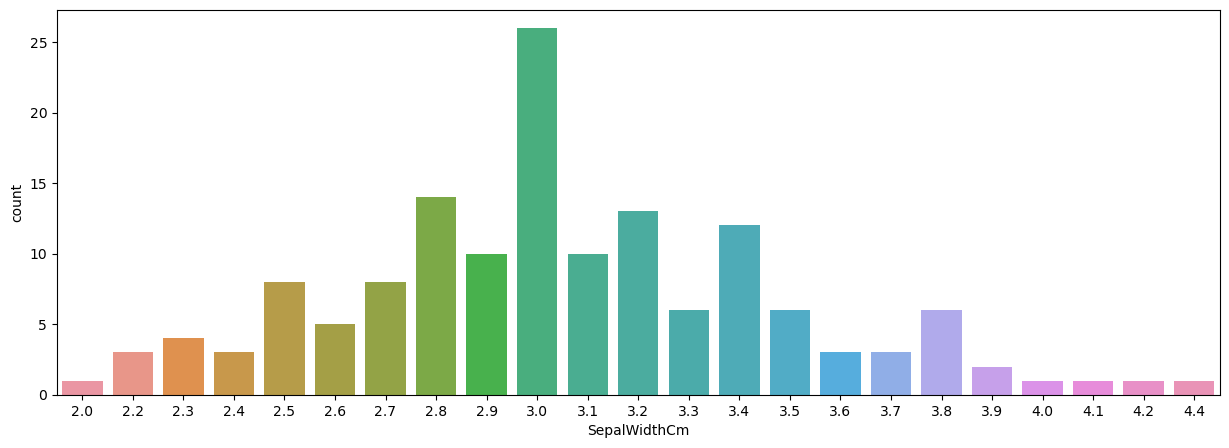

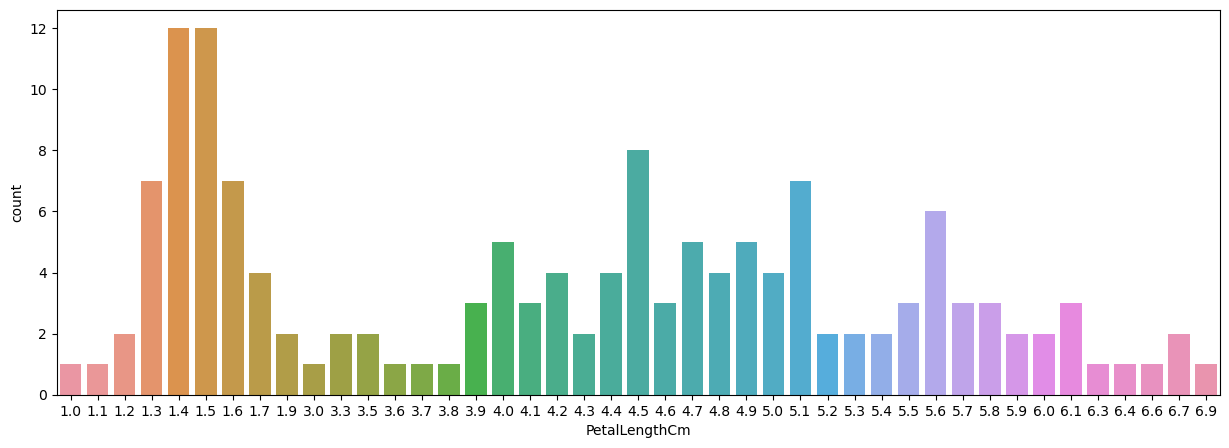

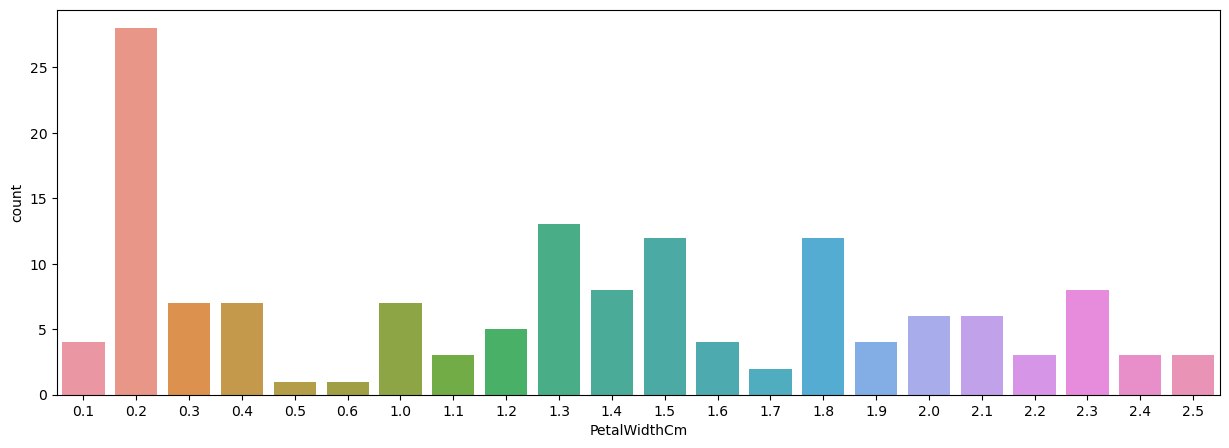

In [145]:
columns_name=iris.columns
columns_name=columns_name.drop('Species')
for c in columns_name:
 plt.figure(figsize=(15,5))
 sns.countplot(x=c,data=iris)
 plt.show()

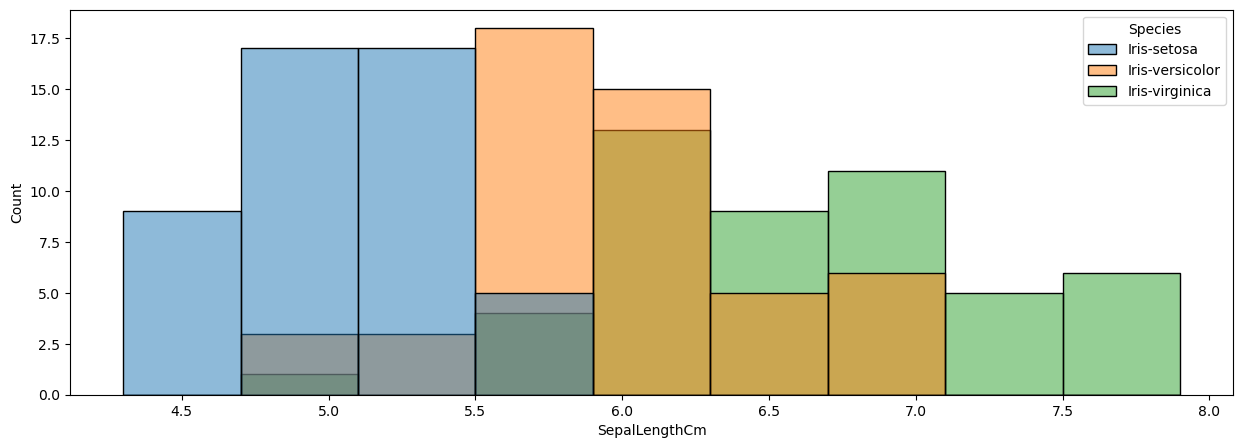

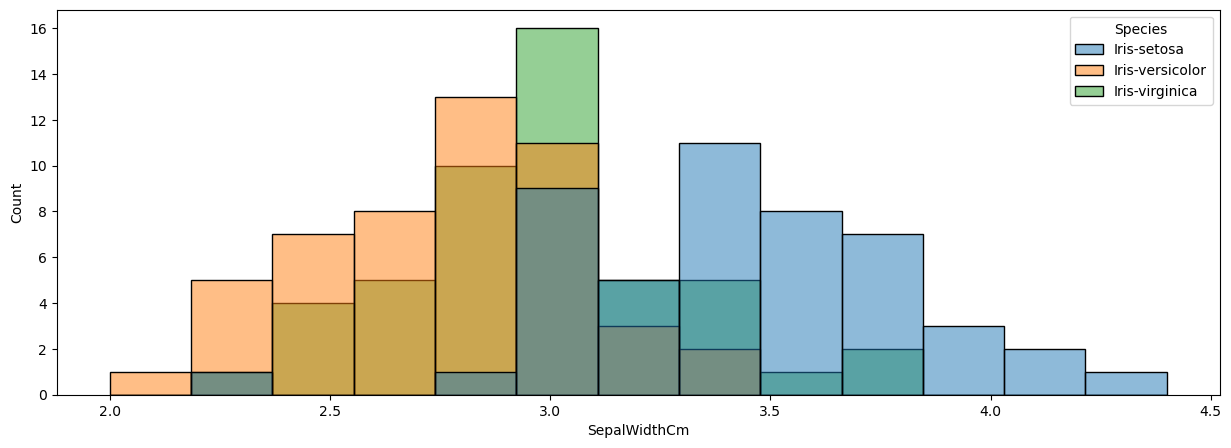

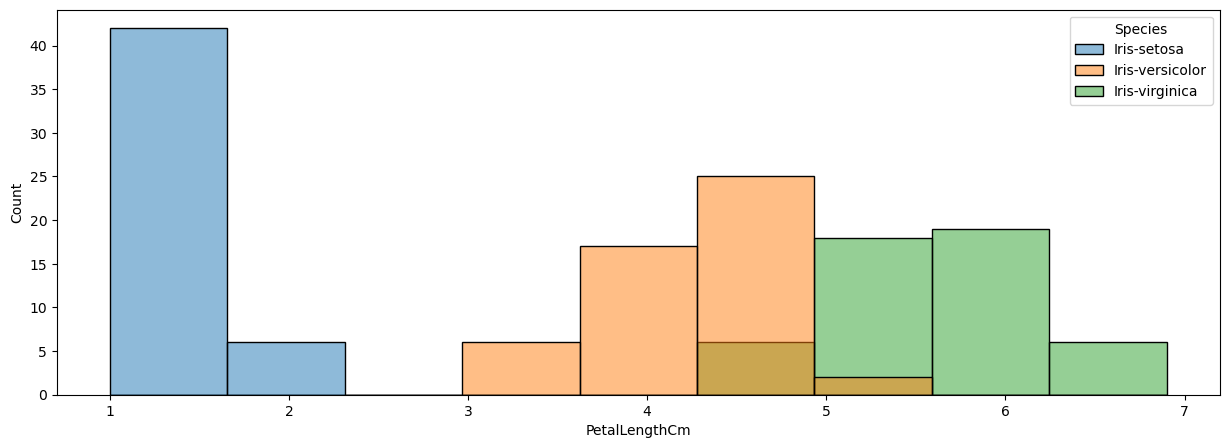

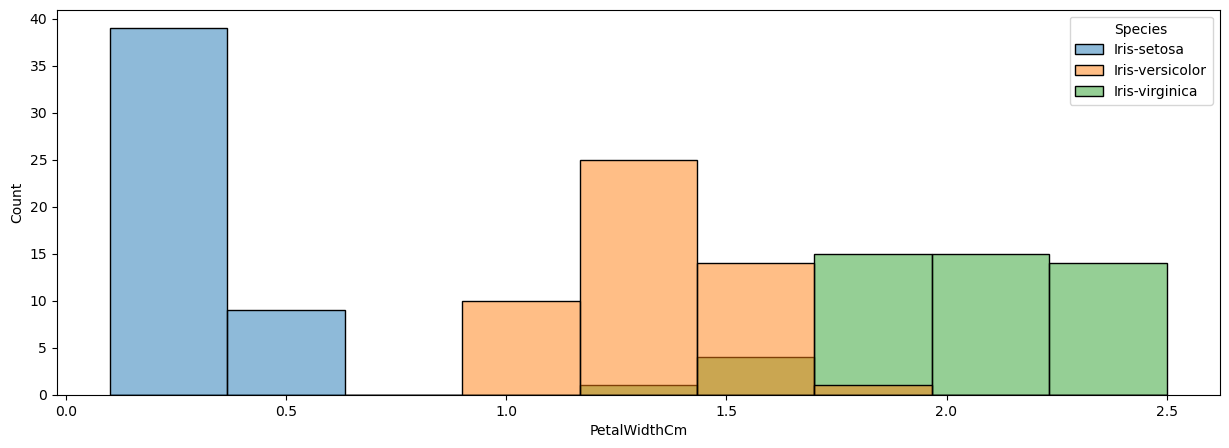

In [161]:
columns_name=iris.columns
columns_name=columns_name.drop('Species')
for c in columns_name:
 plt.figure(figsize=(15,5))
 sns.histplot(x=c,hue='Species',data=iris)
 plt.show()

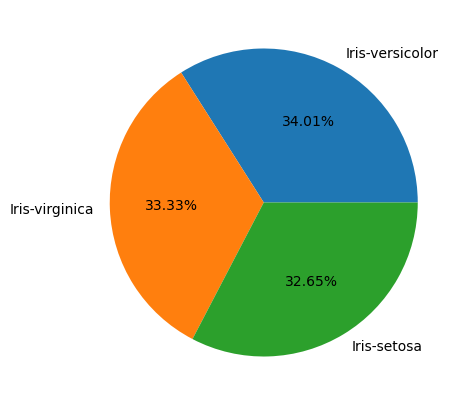

In [147]:
iris["Species"].value_counts().plot.pie(figsize=(6,5),autopct='%1.2f%%')
plt.ylabel(None)
plt.show()

## Train & Test Split

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
x=iris.drop('Species',axis=1)
y=iris['Species']

In [150]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

## Decision Tree

In [151]:
from sklearn.tree import DecisionTreeClassifier 

In [152]:
dt=DecisionTreeClassifier()

In [153]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

# Prediction

In [154]:
predictions=dt.predict(x_test)
df1=x_test
df1 =df1.assign(Species=predictions)
print(df1)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
109            7.2           3.6            6.1           2.5   Iris-virginica
73             6.1           2.8            4.7           1.2  Iris-versicolor
126            6.2           2.8            4.8           1.8   Iris-virginica
21             5.1           3.7            1.5           0.4      Iris-setosa
18             5.7           3.8            1.7           0.3      Iris-setosa
96             5.7           2.9            4.2           1.3  Iris-versicolor
101            5.8           2.7            5.1           1.9   Iris-virginica
95             5.7           3.0            4.2           1.2  Iris-versicolor
92             5.8           2.6            4.0           1.2  Iris-versicolor
147            6.5           3.0            5.2           2.0   Iris-virginica
26             5.0           3.4            1.6           0.4      Iris-setosa
129            7.2           3.0            5.8     

In [155]:
x_new_test =np.array([[6.2,2.8,4.8,1.8]])
prediction = dt.predict(x_new_test)
print("Prediction: {}".format(prediction))

Prediction: ['Iris-virginica']


E:\data\application path\anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Confusion Matrix

In [156]:
from sklearn.metrics import classification_report,confusion_matrix

In [157]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.93      0.87      0.90        15
 Iris-virginica       0.80      0.89      0.84         9

       accuracy                           0.92        37
      macro avg       0.91      0.92      0.91        37
   weighted avg       0.92      0.92      0.92        37



In [158]:
print(confusion_matrix(y_test,predictions))

[[13  0  0]
 [ 0 13  2]
 [ 0  1  8]]


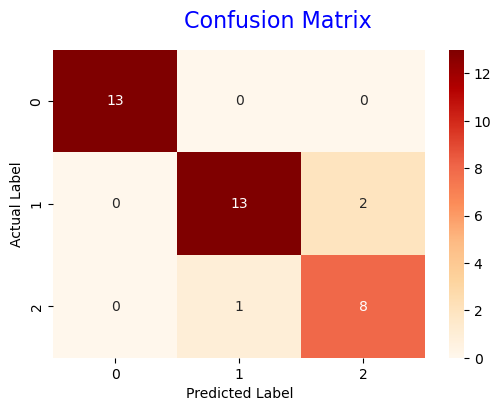

In [159]:
cf_mat=confusion_matrix(y_test,predictions)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cf_mat, annot=True, cmap='OrRd')
fig.suptitle(t='Confusion Matrix',color='blue',fontsize=16)
ax.set(xlabel='Predicted Label' , ylabel='Actual Label')
plt.show()

## Visualize The Decision Tree

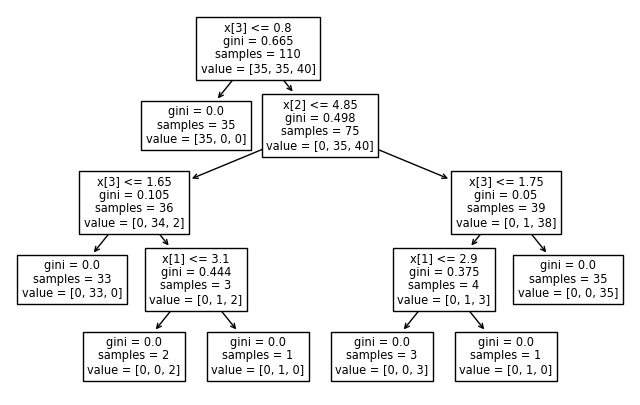

In [160]:
from sklearn import tree
plt.figure(figsize=(8,5))
tree.plot_tree(dt)
plt.show()

In [162]:
# Thank you